+ Requirements:
    1. The estimated time for this activity is approximately half an hour.
<br><br>
+ Objectives of this notebook:
    1. To understand what is an image.
    2. Introduction to OpenCV: learning to read, write, and show images.
<br><br>
+ Summary of activities:
    1. Presentation of basic concepts.
    2. The properties of an image will be analyzed using Python code snippets to read, write and show images.

%%latex
\tableofcontents
\newpage

# What is a digital image?

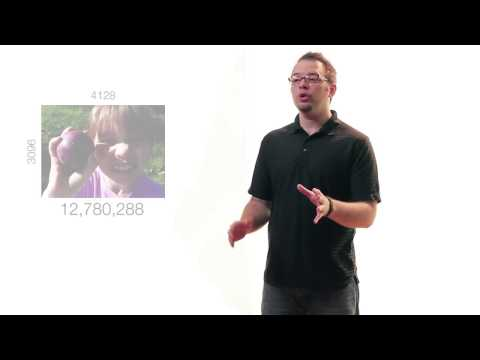

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('TVTn7mYKegY',start=2, end=5*60+6)

# Introduction to OpenCV
In Python you always start by importing all the required modules:

In [ ]:
import numpy as np  # the numpy module is associated with the alias np
import cv2          # OpenCV module
import matplotlib.pyplot as plt  # the matplotlib.pyplot with the alias plt

In [ ]:
# **** It is important to consult the help of the version you are using ****
!python --version
print('Numpy:',np.__version__)
print('OpenCv:',cv2.__version__)

### Read image

In [ ]:
# Ceneration of img_original.bmp image
#zeros = np.zeros((288,360,3), np.uint8)
#b,g,r = cv2.split(zeros)
#b = cv2.circle(b, (180, 144+25), 50, 255, -1)
#g = cv2.circle(g, (180-25, 144-25), 50, 255, -1)
#r = cv2.circle(r, (180+25, 144-25), 50, 255, -1)
#img=cv2.merge([b,g,r])
#ret_ok = cv2.imwrite('../imgs/img_original.bmp', img)

In [ ]:
# TODO later: Run this notebook reading 'img_circles.bmp' image
#img = cv2.imread('imgs/img_original.bmp')
img = cv2.imread('imgs/img_circles.bmp')
print(type(img)) # Prints <class 'numpy.ndarray'>
print(img.dtype) # Prints 'uint8'
print(img.shape) # Prints '(288, 360, 3)'
height, width, channels = img.shape

### Show image

In [ ]:
cv2.imshow('Image', img) # Opens a window to show the image
cv2.waitKey(0)           # Waits until key pressed on the window Image
cv2.destroyAllWindows()  # Closes the window

### Write image
By default, the '.jpg' format compresses the image losing some information.

In [ ]:
ret_ok = cv2.imwrite('imgs/img_saved.jpg', img)
print('Imagen saved:', ret_ok)

In [ ]:
# When saving an image in '.jpg' format the information is compressed
# and there is loss of information
img_readed = cv2.imread('imgs/img_saved.jpg')
if (img_readed == img).all(): # if all pixels are equal
    print('Equal images...')
else:
    print('Different images...')

In [ ]:
# In order not to lose information from the original image, the image must be
# saved with maximum quality in '.bmp' format
ret_ok = cv2.imwrite('imgs/img_saved.bmp', img)
img_readed = cv2.imread('imgs/img_saved.bmp')
if (img_readed == img).all(): # if all pixels are equal
    print('Equal images...')
else:
    print('Different images...')

### Changing image resolution
The image is showed at different resolutions according to the ratio.

In [ ]:
ratios = (16, 32, 64)
for ratio in ratios:
    width_ratio = ratio
    height_ratio = ratio
    new_size = ( max(int(width/width_ratio), 1), max(int(height/height_ratio), 1) )
    img_resized = cv2.resize(img, new_size, interpolation = cv2.INTER_AREA)
    print('The size of the img_resized is: ', img_resized.shape)

    # Showing img_resized
    cv2.imshow('Image', img_resized) 
    cv2.waitKey(0)           
    cv2.destroyAllWindows() 

    # If the image is smaller than 32 pixels, the values of the matrix are printed
    pixels_num = new_size[0]*new_size[1]
    if pixels_num < 32:
        print('--------------------------------------------------------------')
        print(img_resized[:,:,0]) # Prints Blue channel (B)
        print(img_resized[:,:,1]) # Prints Green channel (G)
        print(img_resized[:,:,2]) # Prints Red channel (R)
        print('--------------------------------------------------------------')

### How to access the pixel values?

In [ ]:
# Accessing an array 'numpy.ndarray' is equivalent to Matlab

# Gets the BGR value of the first pixel (0,0)
bgr_00 = img_resized[0,0,:]
print('BGR value of pixel (0,0) =', bgr_00)

# Gets the BGR value of the center pixel
p = np.asarray(np.int16(img_resized.shape[0:2]/np.asarray([2])))
bgr_p = img_resized[p[0],p[1],:]
print('BGR value of pixel ('+str(p[0])+','+str(p[1])+') =', bgr_p)

# Gets the BGR value of the last pixel
p = np.asarray(img_resized.shape[0:2])-np.asarray([1,1])
bgr_p = img_resized[p[0],p[1],:]
print('BGR value of pixel ('+str(p[0])+','+str(p[1])+') =', bgr_p)

### How to get an image channel?

In [ ]:
img_green = img[:,:,1]

# Prints the size of the image matrix
print('The size of the image is: ', img_green.shape)

# Prints the type of the image matrix
print('The type of the image is:',type(img_green),'of', img_green.dtype)

# Shows the green channel
cv2.imshow('Image green', img_green) 
cv2.waitKey(0)           
cv2.destroyAllWindows() 

In [ ]:
# Shows the gray image as an BGR image
img_gray_bgr = cv2.merge([img_green, img_green, img_green])

# Prints the size of the image matrix
print('The size of the image is: ', img_gray_bgr.shape)

# Prints the type of the image matrix
print('The type of the image is:',type(img_gray_bgr),'of', img_gray_bgr.dtype)

cv2.imshow('Image gray as bgr', img_gray_bgr) 
cv2.waitKey(0)           
cv2.destroyAllWindows() 

### Image BGR channels

In [ ]:
# Split the BGR image into three planes
blue, green, red = cv2.split(img)

# Composing an image containing the three channels (represented in color)
zeros = np.zeros(blue.shape, np.uint8)
img_composition = np.zeros((height, width*3, channels), np.uint8)
img_composition[:,         0:width, :] = cv2.merge([blue, zeros, zeros])
img_composition[:,   width:2*width, :] = cv2.merge([zeros, green, zeros])
img_composition[:, 2*width:3*width, :] = cv2.merge([zeros, zeros, red])

# Shows the composition image
cv2.imshow('Composition', img_composition) 
cv2.waitKey(0)           
cv2.destroyAllWindows() 

# Composing an image containing the three channels (represented in gray)
img_composition = np.zeros((height, width*3, channels), np.uint8)
img_composition[:,         0:width, :] = cv2.merge([blue, blue, blue])
img_composition[:,   width:2*width, :] = cv2.merge([green, green, green])
img_composition[:, 2*width:3*width, :] = cv2.merge([red, red, red])

# Shows the composition image
cv2.imshow('Composition', img_composition) 
cv2.waitKey(0)           
cv2.destroyAllWindows() 

# References
+ [Python documentation](https://docs.python.org/3/)
+ [Numpy documentation](https://numpy.org/doc/)
+ [Documentación de OpenCV 4.5](https://docs.opencv.org/4.5.0/)
+ [Machine Learning for OpenCV 4 - Second Edition
by Vishwesh Ravi Shrimali; Michael Beyeler; Aditya Sharma
Published by Packt Publishing, 2019](https://learning.oreilly.com/library/view/machine-learning-for/9781789536300/cover.xhtml)
+ [Machine Learning for OpenCV 4 : Intelligent Algorithms for Building Image Processing Apps Using OpenCV 4, Python, and Scikit-Learn. by Sharma, Aditya, et al. Second edition., 201](https://polibuscador.upv.es/permalink/f/6ptg6i/alma5191663190003706)